In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [106]:
# Load the dataset
data = pd.read_excel("Measured_value+Raw_spectral_data (only full dataset).xlsx")
data

,Sample,MC,780,782,784,786,788,790,792,794,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,Sample_1,0.01195,0.270044,0.268449,0.266910,0.265422,0.263975,0.262562,0.261173,0.259799,...,1.421252,1.421191,1.420901,1.420202,1.419100,1.417800,1.416409,1.414924,1.413351,1.411798
1,Sample_2,0.01435,0.264508,0.262929,0.261403,0.259925,0.258487,0.257079,0.255695,0.254330,...,1.411636,1.411252,1.410709,1.409868,1.408694,1.407334,1.405934,1.404536,1.403035,1.401390
2,Sample_3,0.01610,0.262533,0.261012,0.259537,0.258104,0.256703,0.255329,0.253978,0.252647,...,1.423443,1.422988,1.422389,1.421549,1.420377,1.418955,1.417358,1.415643,1.413889,1.412178
3,Sample_4,0.03230,0.276499,0.275015,0.273579,0.272188,0.270836,0.269514,0.268213,0.266927,...,1.388129,1.387836,1.387321,1.386537,1.385489,1.384249,1.382904,1.381513,1.380063,1.378570
4,Sample_5,0.03430,0.268493,0.267082,0.265719,0.264398,0.263108,0.261842,0.260596,0.259370,...,1.513477,1.512955,1.512212,1.511368,1.510326,1.508889,1.507131,1.505408,1.503886,1.502366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Sample_132,0.08180,0.497859,0.495576,0.493330,0.491130,0.488972,0.486844,0.484727,0.482613,...,1.616681,1.616623,1.616580,1.616638,1.616535,1.615978,1.615050,1.614146,1.613553,1.613278
132,Sample_133,0.08295,0.497052,0.494769,0.492523,0.490321,0.488162,0.486031,0.483912,0.481797,...,1.612830,1.612948,1.613128,1.613347,1.613570,1.613562,1.613072,1.612312,1.611614,1.611008
133,Sample_134,0.09430,0.365887,0.364049,0.362267,0.360536,0.358846,0.357188,0.355556,0.353952,...,1.525642,1.525743,1.525805,1.525607,1.525159,1.524658,1.524177,1.523685,1.523081,1.522381
134,Sample_135,0.09585,0.378065,0.376003,0.373997,0.372039,0.370120,0.368234,0.366375,0.364543,...,1.531671,1.531942,1.532036,1.531871,1.531453,1.530893,1.530305,1.529800,1.529375,1.528949


The dataset contains spectral scan data for various samples, with each row representing a sample. The columns include a Sample, the moisture content, and spectral data points for wavelengths ranging from 780nm to 2498nm at 2nm intervals. In total, there are 861 spectral features for each sample.

**Exploratory Data Analysis (EDA)**

In [107]:
# Check for missing values
missing_values = data.isnull().sum().sum()
missing_values

0

There are no missing values in the dataset, which simplifies the preprocessing step as we don't need to impute or remove any data.

c:\Users\charu\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


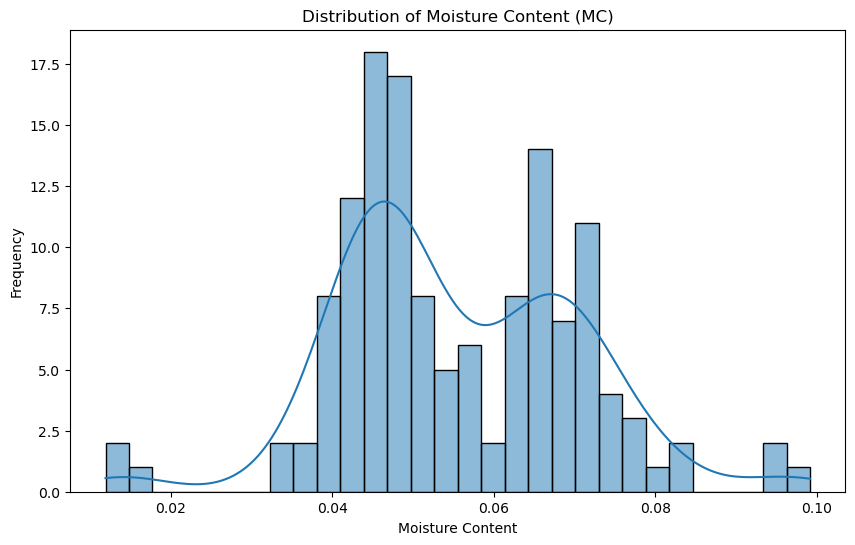

In [108]:
# Visualizing the distribution of moisture content
plt.figure(figsize=(10, 6))
sns.histplot(data['MC'], bins=30, kde=True)
plt.title('Distribution of Moisture Content (MC)')
plt.xlabel('Moisture Content')
plt.ylabel('Frequency')
plt.show()

The moisture content of the samples varies widely, as depicted in the histogram. This variability suggests a diverse dataset.

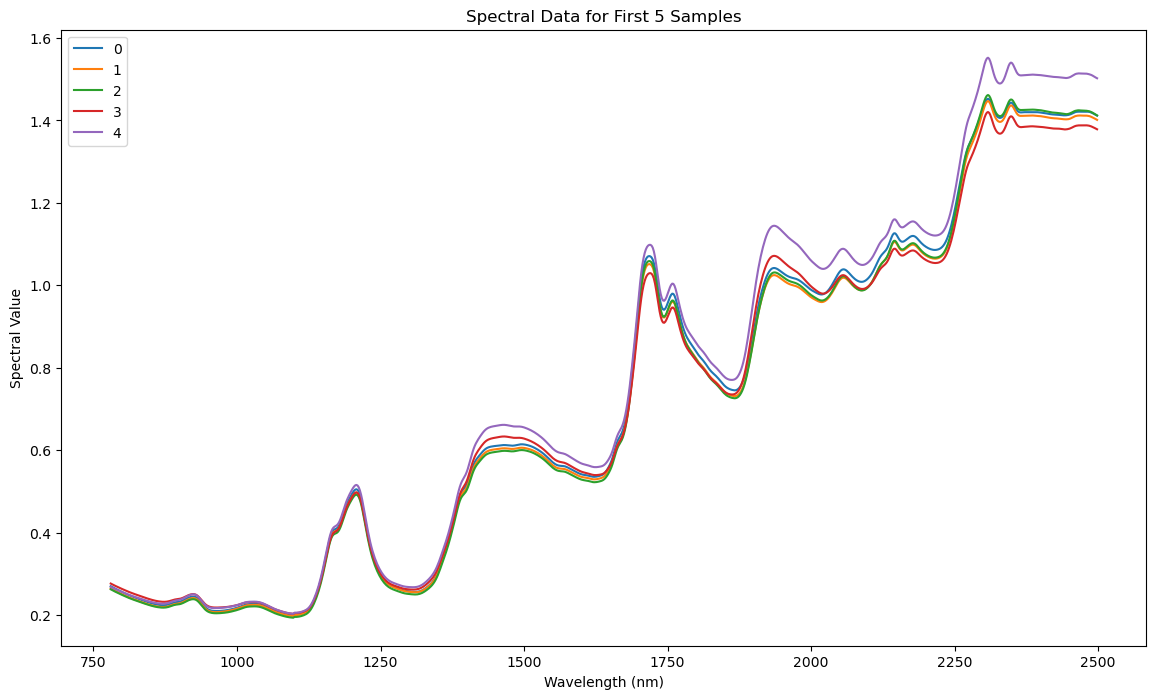

In [109]:
#Visualizing a subset of spectral features for a few samples
plt.figure(figsize=(14, 8))
sample_spectra = data.drop(['Sample', 'MC'], axis=1).iloc[:5, :]
plt.plot(sample_spectra.columns, sample_spectra.transpose())
plt.title('Spectral Data for First 5 Samples')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Spectral Value')
plt.legend(sample_spectra.index)
plt.show()

The spectral scan data for the first five samples show variability in the spectral values across different wavelengths. This variability is expected and is key to predicting moisture content.

c:\Users\charu\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charu\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charu\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\charu\anaconda3\envs\datascience\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

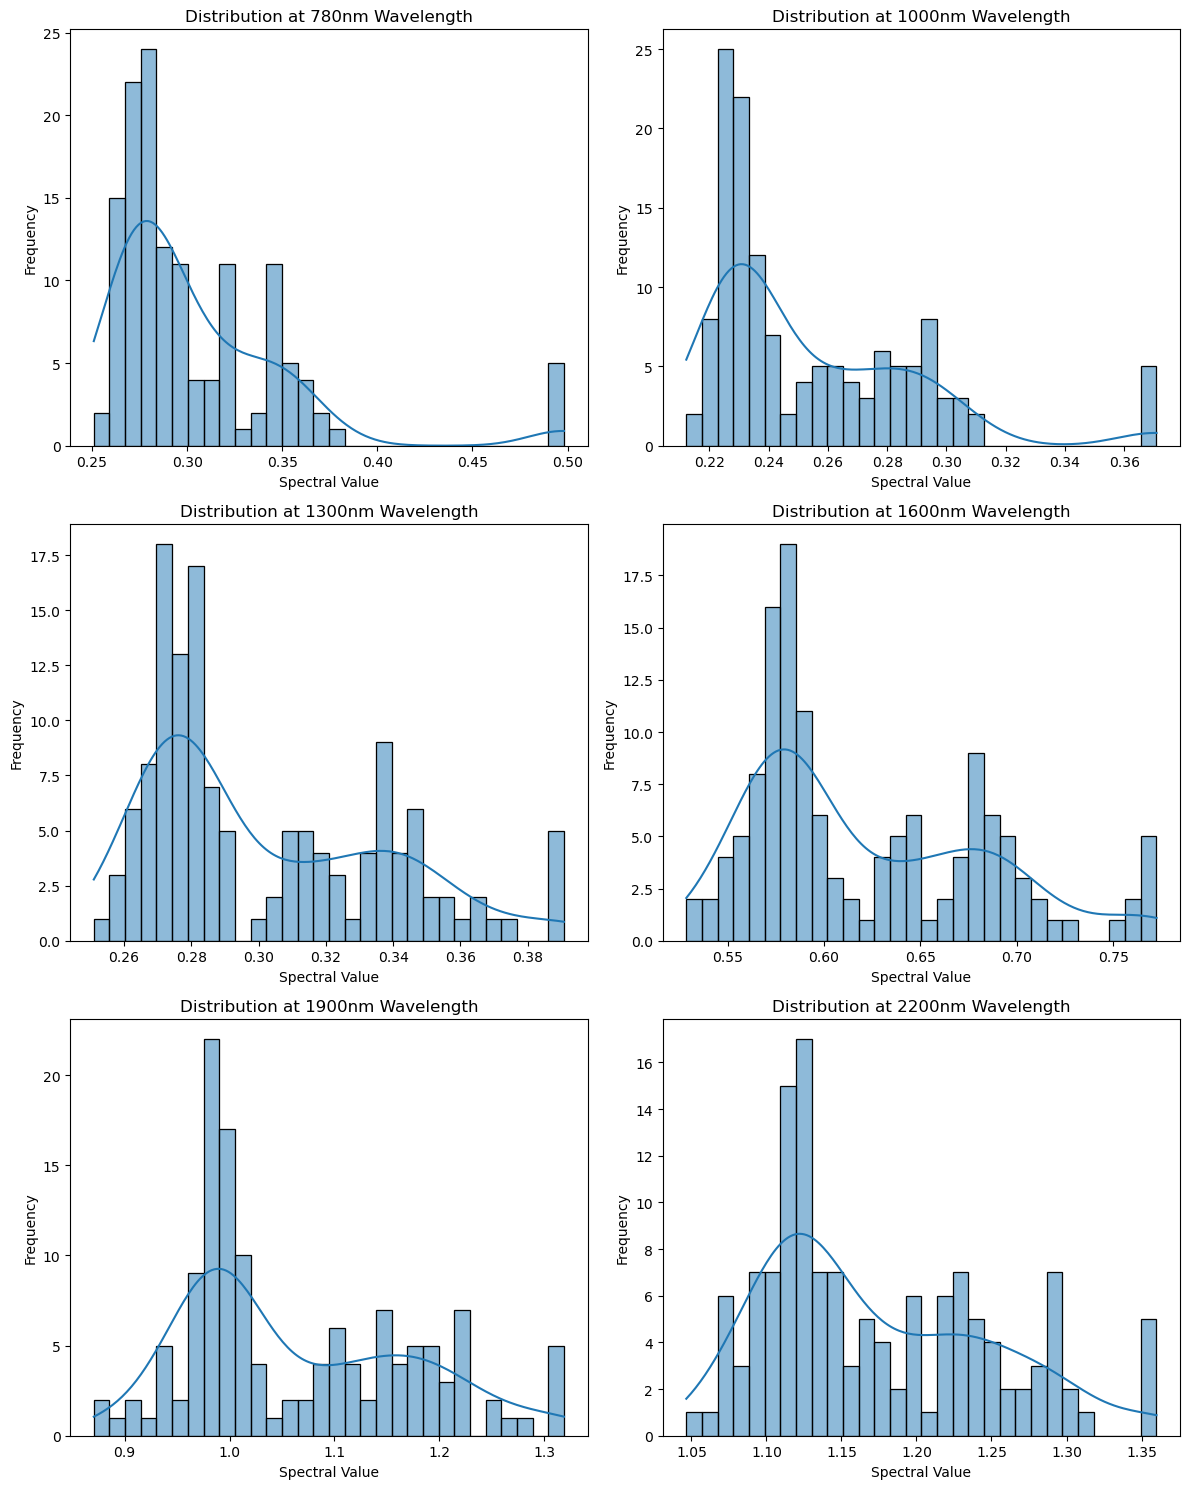

In [110]:
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

# Select a subset of wavelengths to visualize
wavelengths = [780, 1000, 1300, 1600, 1900, 2200]

for ax, wavelength in zip(axes, wavelengths):
    sns.histplot(data[wavelength], bins=30, kde=True, ax=ax)
    ax.set_title(f'Distribution at {wavelength}nm Wavelength')
    ax.set_xlabel('Spectral Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


This step helps us understand the variability and distribution of spectral data across wavelengths.

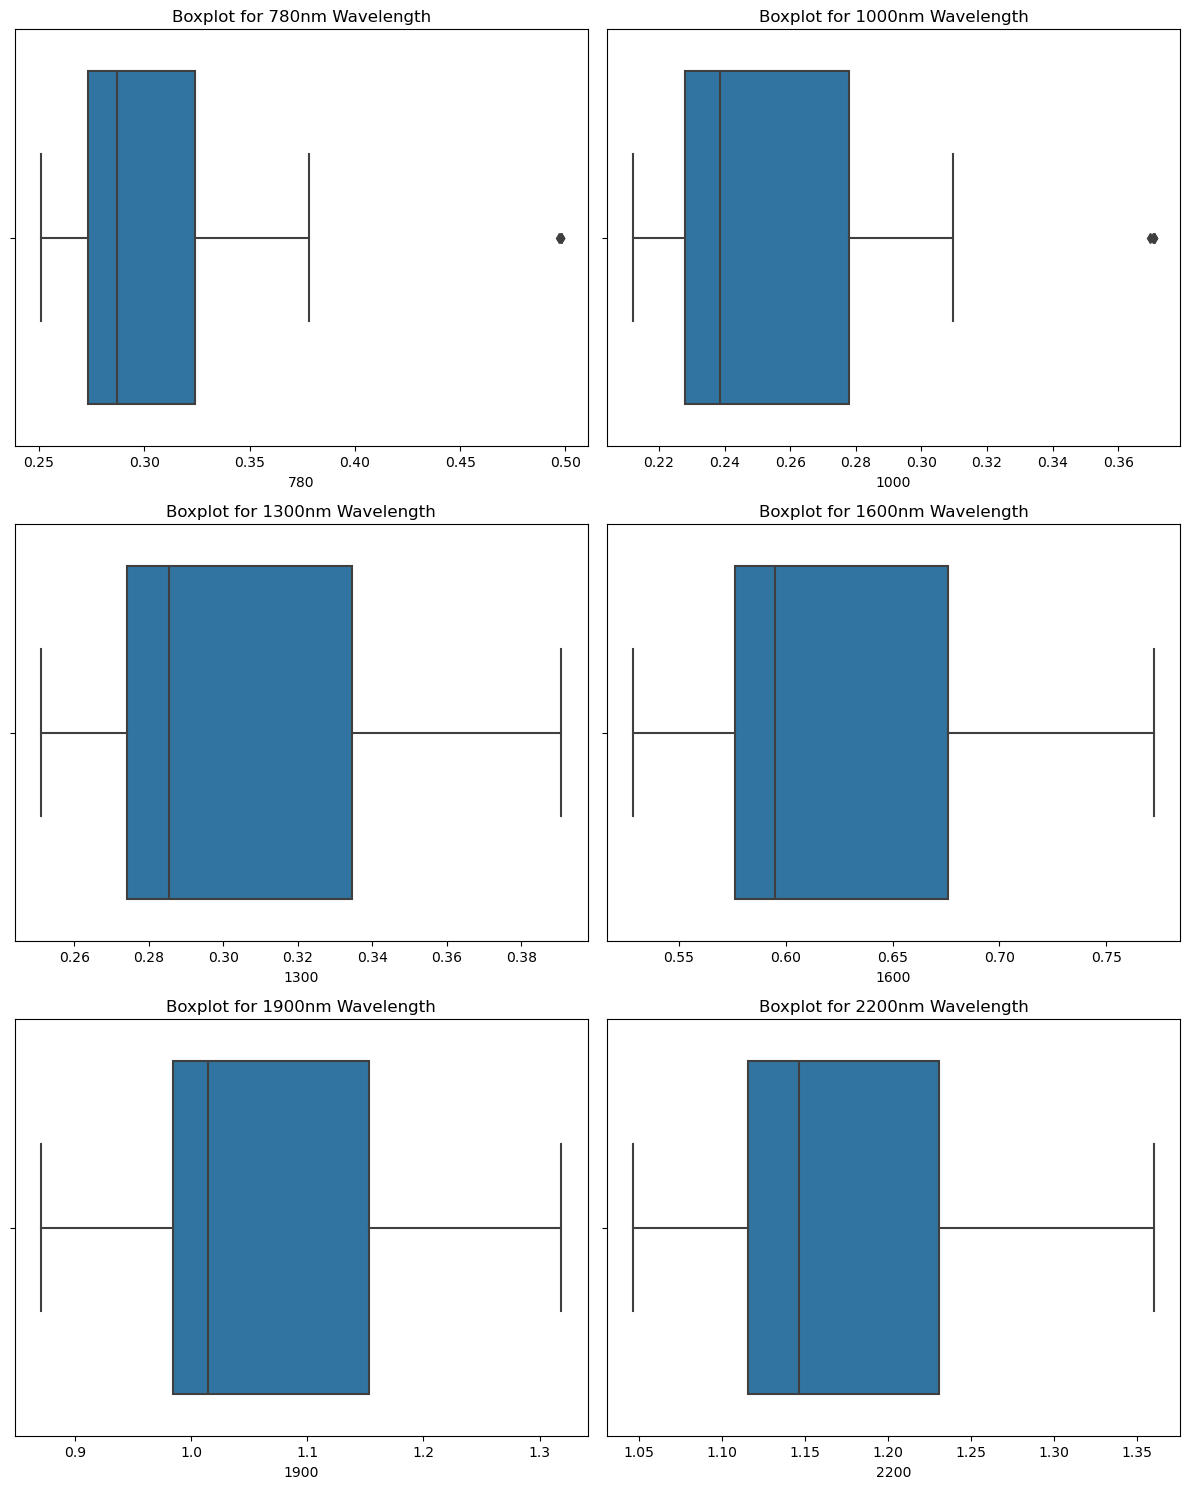

In [111]:
# Detecting outliers in a subset of spectral features
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for ax, wavelength in zip(axes, wavelengths):
    sns.boxplot(x=data[wavelength], ax=ax)
    ax.set_title(f'Boxplot for {wavelength}nm Wavelength')

plt.tight_layout()
plt.show()


Use boxplots to detect outliers in the spectral data, focusing again on a subset of wavelengths for visualization.

In [112]:
print(data.shape)

(136, 862)


In [113]:
#define a function for cfiler outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df_filtered


Filter outliers from a DataFrame for a column. It uses the Interquartile Range (IQR) method.

In [114]:
# Removing outliers for 780nm and 1000nm wavelengths
data_filtered = remove_outliers(data, 780)
data_filtered = remove_outliers(data_filtered, 1000)

print(data_filtered.shape)

(131, 862)


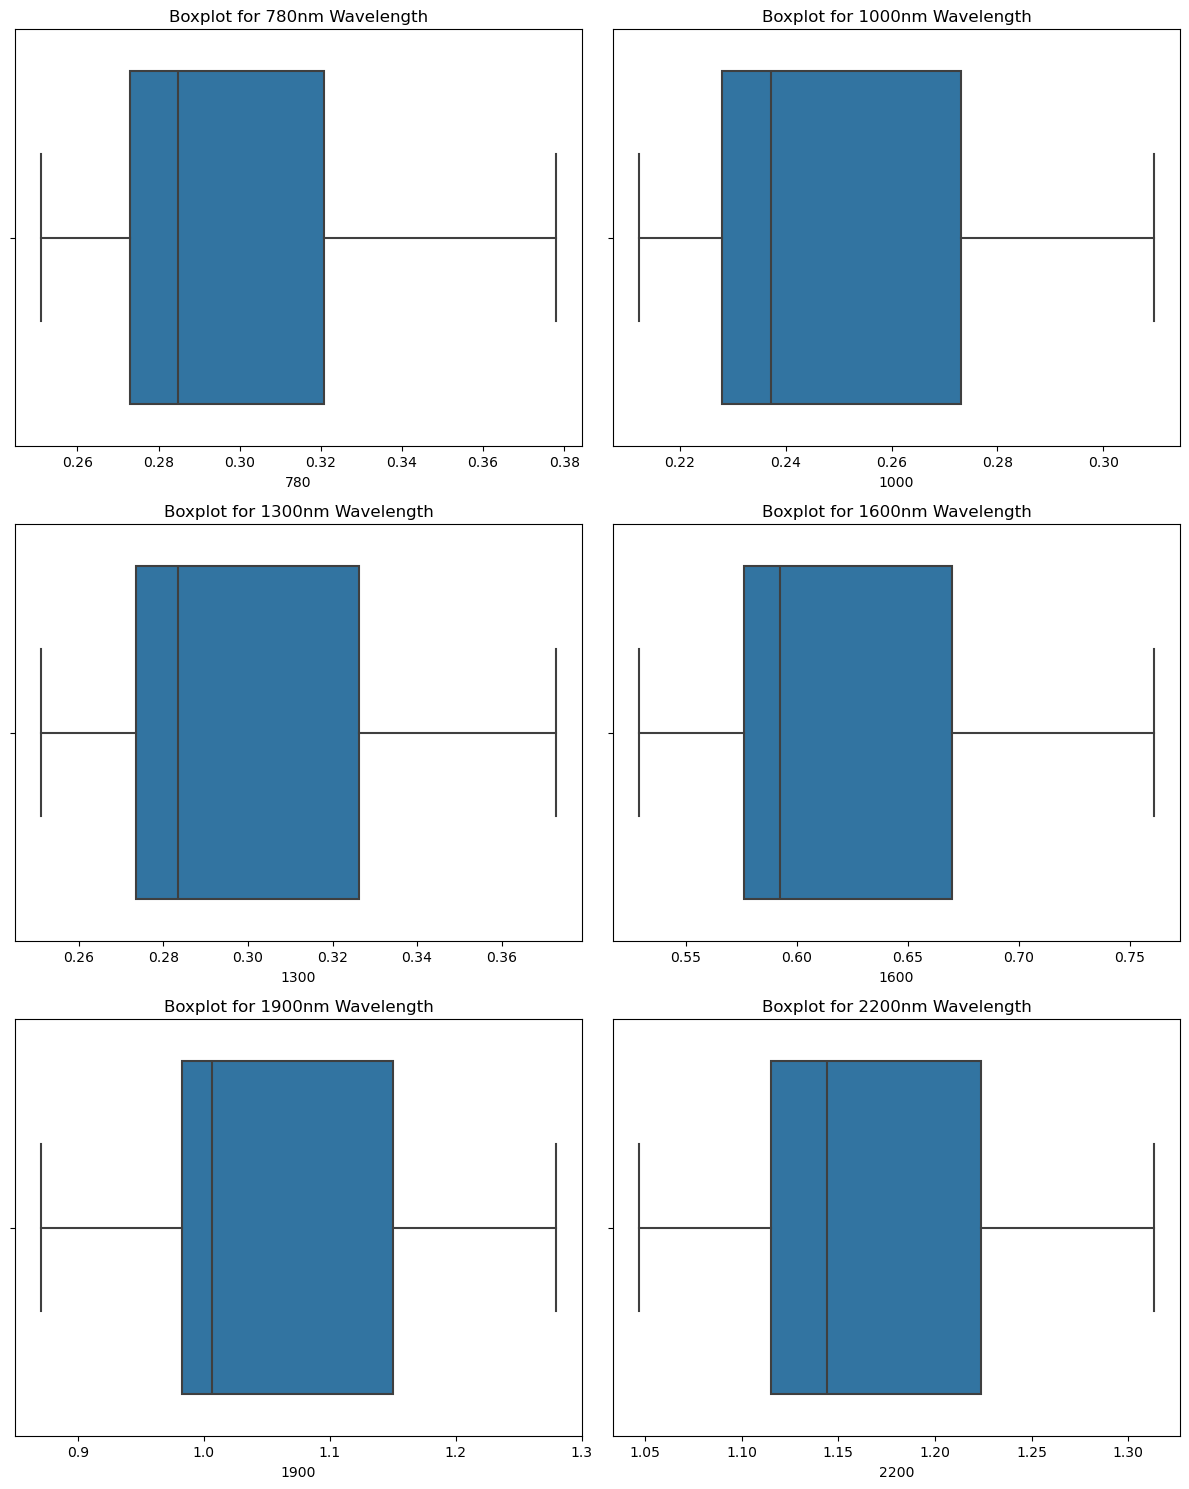

In [115]:
# Check outliers in a subset of spectral features 
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for ax, wavelength in zip(axes, wavelengths):
    sns.boxplot(x=data_filtered[wavelength], ax=ax)
    ax.set_title(f'Boxplot for {wavelength}nm Wavelength')

plt.tight_layout()
plt.show()


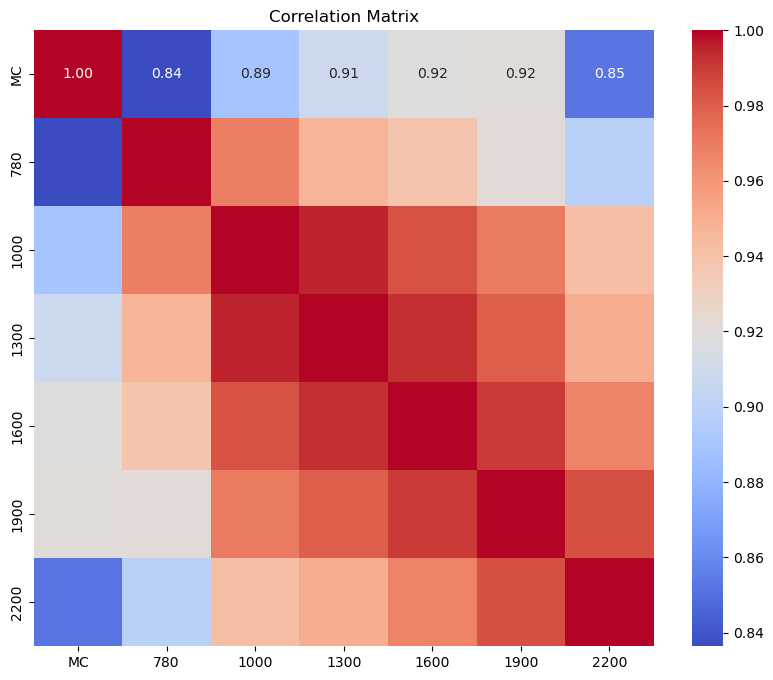

In [116]:
features = ['MC'] + wavelengths
corr_matrix = data_filtered[features].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Calculate and visualize the correlation matrix to identify potential relationships between features and the target variable

**Feature Engineering**

In [117]:
# Dropping the 'Sample' column, it's not needed for modeling
data_model = data_filtered.drop(['Sample'], axis=1)

In [118]:
# Separating features and target variable
X = data_model.drop(['MC'], axis=1)
y = data_model['MC']

In [119]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

standardize the spectral features since the scales across different wavelengths may vary. This standardization ensures that each feature contributes equally to the regression models.

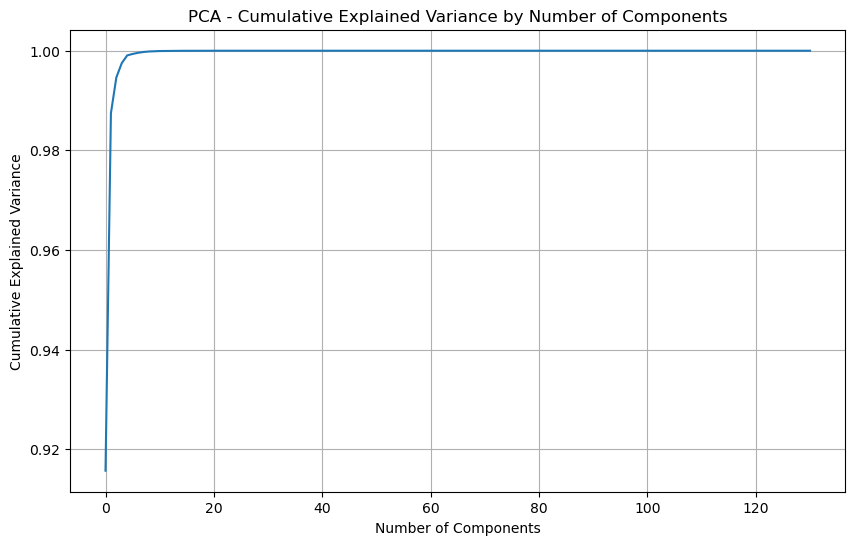

In [120]:
# Applying PCA to reduce dimensionality while explaining a high variance of the dataset
pca = PCA().fit(X_scaled)

# Plotting the cumulative explained variance by the number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance by Number of Components')
plt.grid(True)
plt.show()

In [121]:
# Choosing the number of components that explain >95% of variance
n_components_95_var = np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0] + 1
n_components_95_var

2

The Principal Component Analysis (PCA) reveals that just two components can explain over 95% of the variance in the dataset. This significant reduction from 861 spectral features to 2 principal components suggests that we can greatly simplify our predictive model without losing much information.

**Predictive Regression Analysis**

In [122]:
# Applying PCA with the determined number of components
pca = PCA(n_components=n_components_95_var)
X_pca = pca.fit_transform(X_scaled)

In [123]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [124]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [125]:
# Training and evaluating models
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    results.append((name, rmse, r2))

In [126]:
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R² Score'])
results_df.sort_values(by='R² Score', ascending=False)

,Model,RMSE,R² Score
1,Ridge Regression,0.004242,0.866720
0,Linear Regression,0.004242,0.866717
4,Gradient Boosting,0.007082,0.628521
3,Random Forest,0.007887,0.539268
2,Lasso Regression,0.011652,-0.005624


The predictive regression analysis, using the dataset transformed to two principal components, yields the following results for our models:

Ridge Regression and Linear Regression performed similarly and best among the tested models, with an R² score of approximately 0.86672, indicating that they can explain around 86.67% of the variance in the moisture content from the PCA-transformed spectral data. The RMSE (Root Mean Square Error) for these models is around 0.004242, indicating the average error in the moisture content predictions.

Gradient Boosting showed slightly lower performance with an R² score of 0.628521 and an RMSE of 0.007082.

Random Forest had a lower R² score of 0.539268 and an RMSE of 0.007887.

Lasso Regression performed poorly compared to the other models, with a negative R² score of -0.005624, indicating that it did worse than a simple mean model and had the highest RMSE of 0.011652.

These results demonstrate the potential of using spectral data, even when reduced in dimensionality, to predict moisture content accurately. Ridge and Linear Regression models in particular show good results.

This analysis, including EDA, feature engineering, and model training, provides a comprehensive overview of how to approach predicting moisture content from spectral data.